## EDA

### Importing data/libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/ML Dataset cleaned.csv')

### Purpose of this EDA
The purpose of this EDA (Exploratory Data Analysis) is to understand when customers churn the most (meaning leave/unsubscribe from company service). By understanding the reason behind churning we can can lessen it, and improve sells, customer retention, etc.

#### General stats

In [4]:
df.head(2)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [7]:
df.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


#### Categorical Variable Distributions

***Insights from below graphs:***
1. (Gender) First, graph shows a distribution of Male and Female numbers. The graph shows that Male's and Female's are of almost same number in whole dataset.
2. (Partner) This graph shows how many people are partner of company services. And from graph we can understand most of people are not partners, but almost same number of people are partners (Near same). 
3. (Dependents) This column means whether the applicant/customer has, people who depends on them such as children, family, etc. The graph show that's around 2000 customers for data have a family and most of the people don't have which is around 5000. This column can affect the churning as if customer has family he has to be financial stable. Which could mean that he can pay for services in continuous manner. This could also means that if customer doesn't have family, he has more money to spare so he can also pay for services.
4. (PhoneService) This column represent how many customers have subscribed to Phone services. Which is around 6000 customer. This column shows how much important phone is for customer. 
5. (MultipleLines) column shows whether customer has applied for muliple connections of phone service. Graph shows that half of the customers don't have multiple connection of phone. and around 3000 customers has multiple connection of phones.
6. (InternetService) this column shows how many customer has internet service subscribtion. Graph shows that around 1500 customer don't have internet line, and rest all have either of type optical fiber or of DSL type.
7. (OnlineSecurity) this column shows how many customer has online security(anti-virus/firewall) on their internet line. Graph shows that around 2000 customers only have online security opted, and around 1500 don't have internet line in the first place, and rest don't have online security even if they have internet.
8. (Contract) this column shows type of contract customer has while opting for some service. Graph shows around 4000 opted for month-to-month payment, and 1,500 customers opted for yearly payment, and rest (more than 1500) opted for two year payment.
9. (PaperlessBilling) this column shows how many customer opted for paperless (digital) mode of payment. Graph shows around 4000 customer opted for digital payment method, and rest for physical payments. This can corelate to contract. For example people with short contract (month to month) has to pay several times, so they have higher chances of opting for paperless (digital method).  
10. (PaymentMethod) this column shows how many customers opted for which type of payment method. There are four type of payment methods which are Electronic check, Mailed check, Bank transfer, credit card. Most of the customer (around 1700) opted for Electronic check and rest all opted for other three with almost equal distribution.
11. (Churn) How many customers are churning and how many not. As seen in graph around 5000 customer didn't churn from company services.

Bar plot for categorical variables

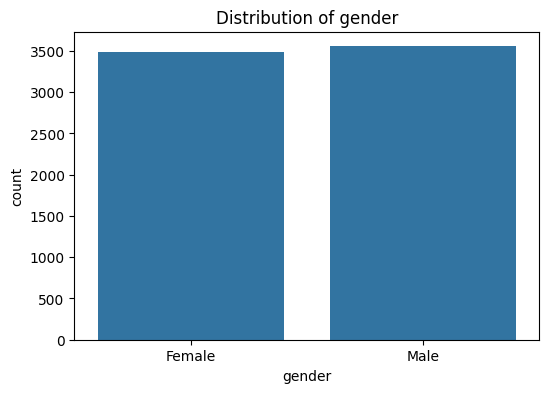

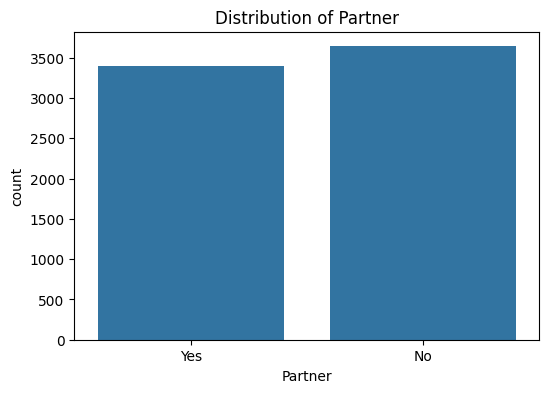

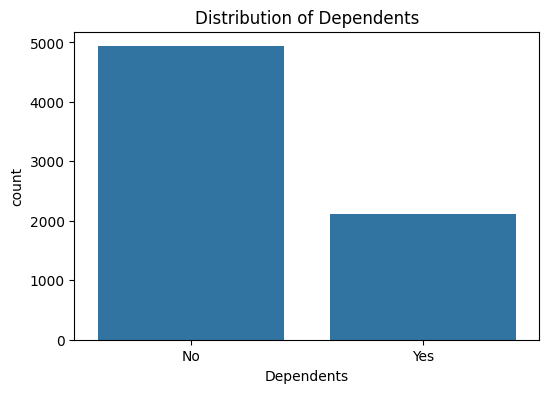

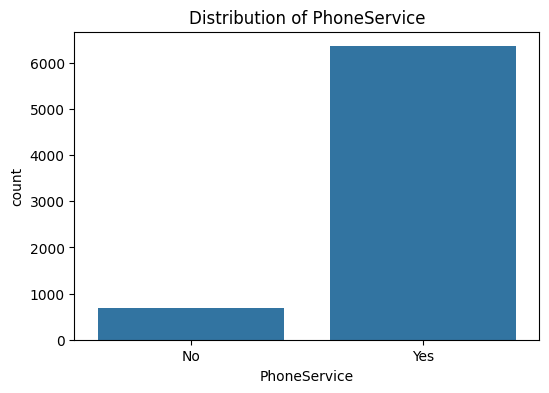

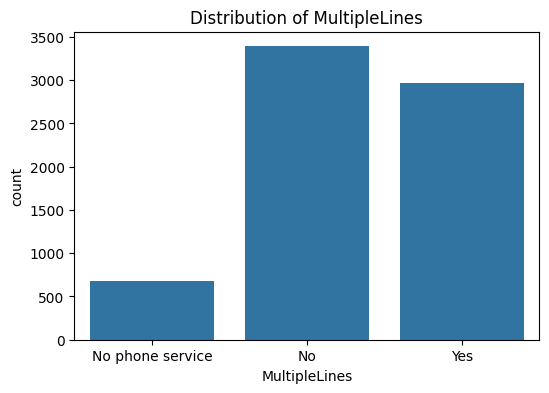

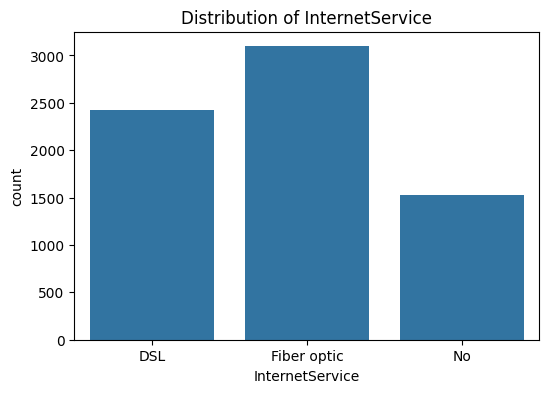

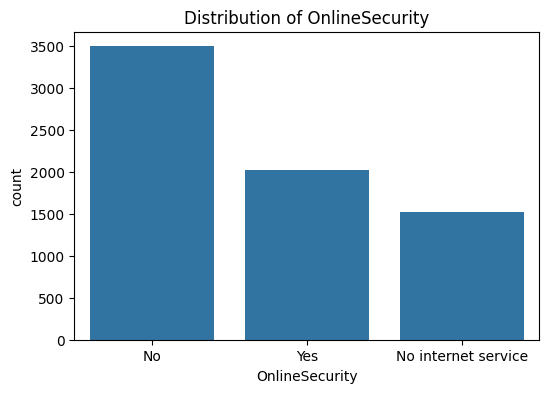

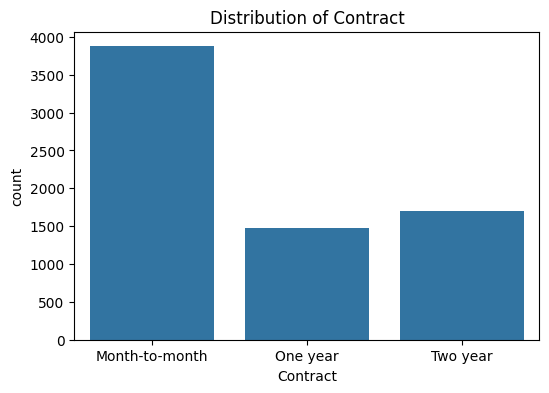

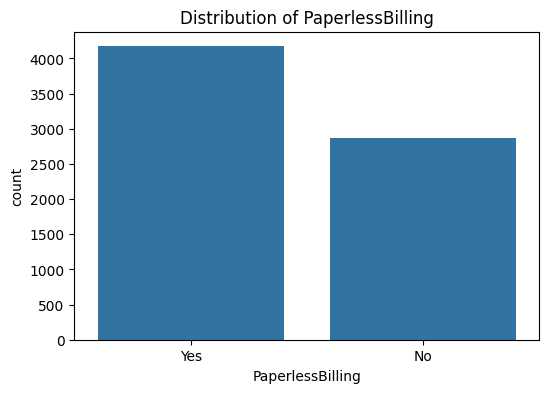

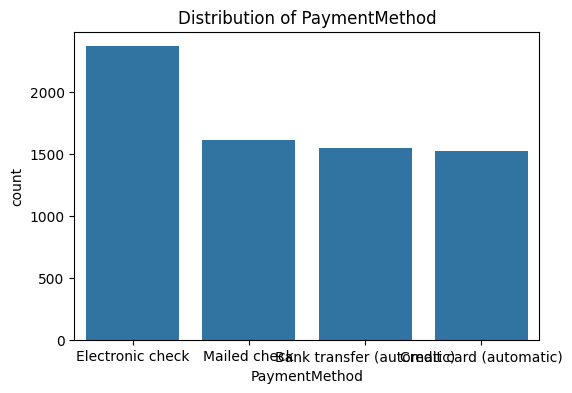

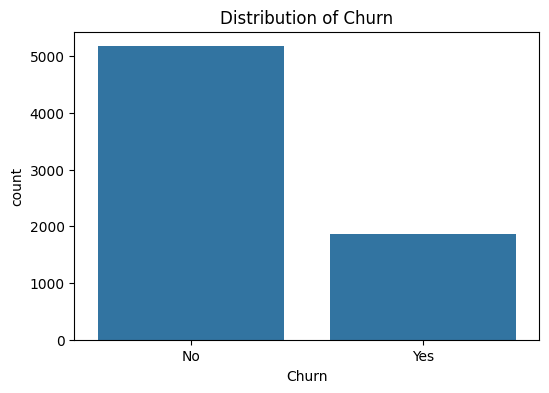

In [9]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'Contract', 'PaperlessBilling',
                    'PaymentMethod', 'Churn']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


#### Numerical Variable Distributions

In [12]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


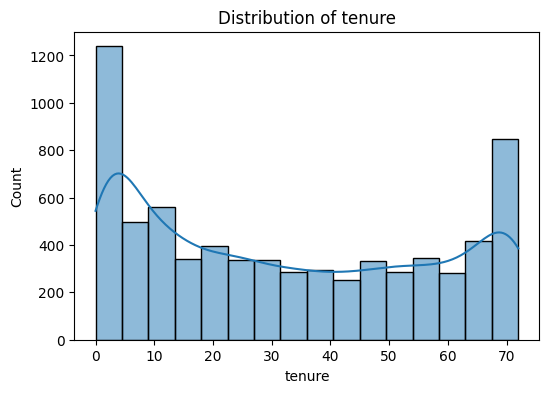

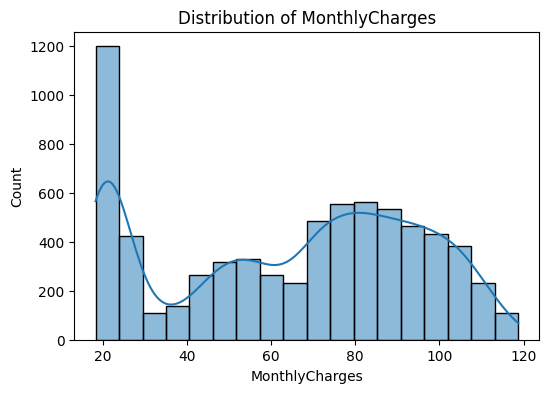

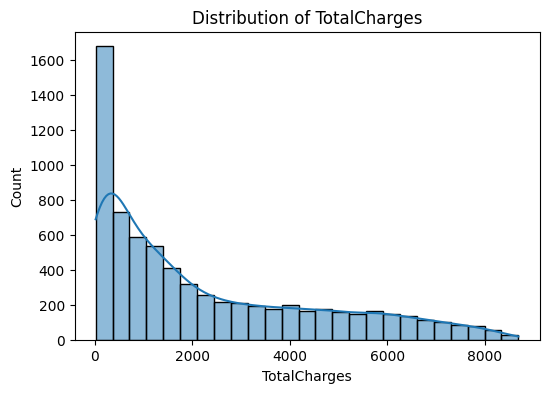

In [14]:
numerical_col = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Categorical Variables vs. Churn

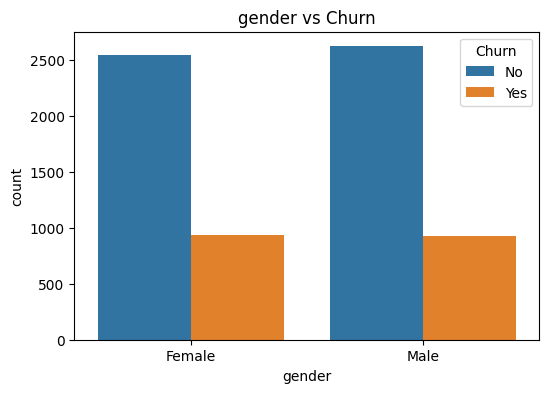

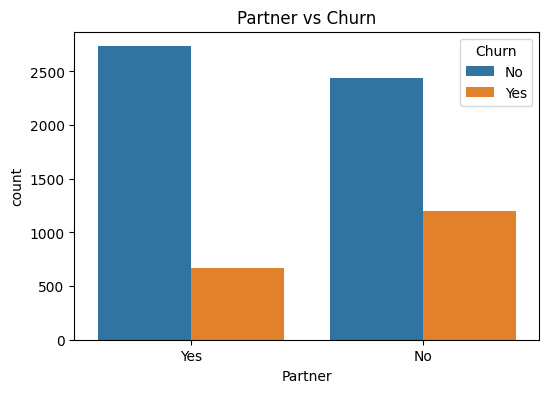

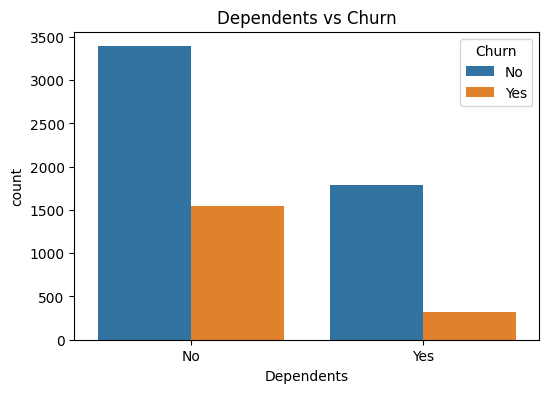

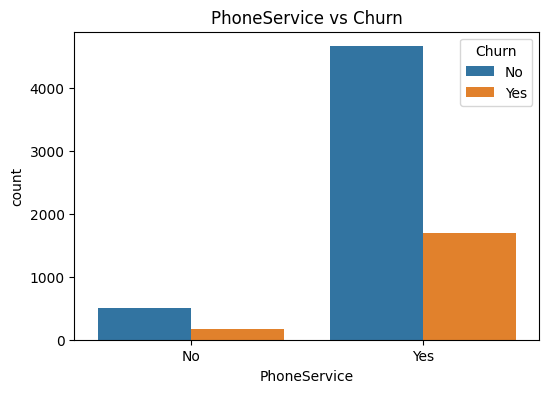

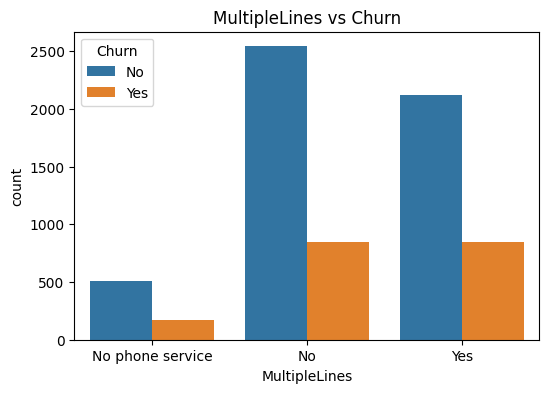

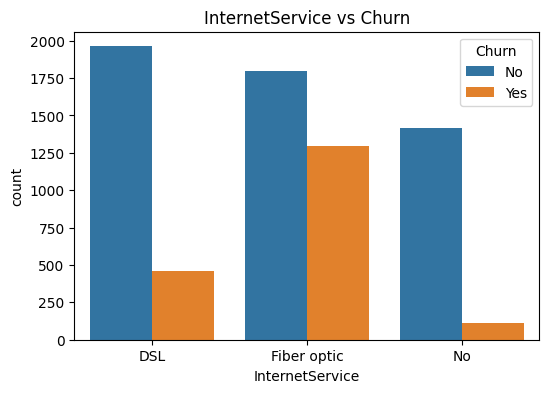

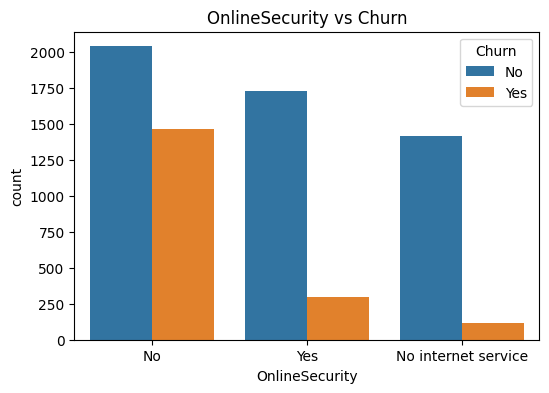

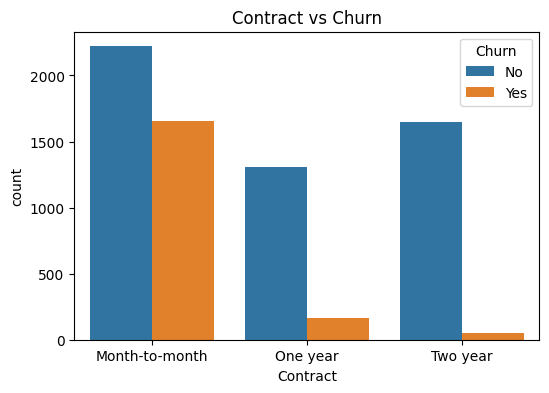

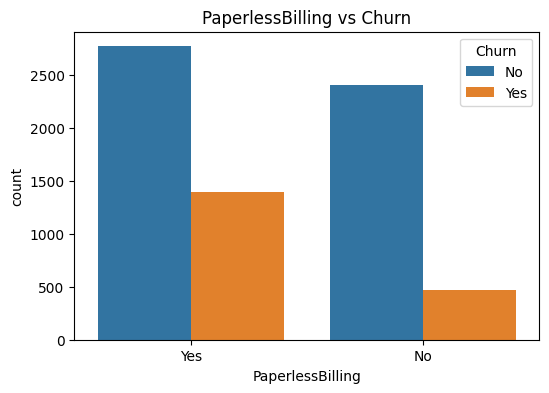

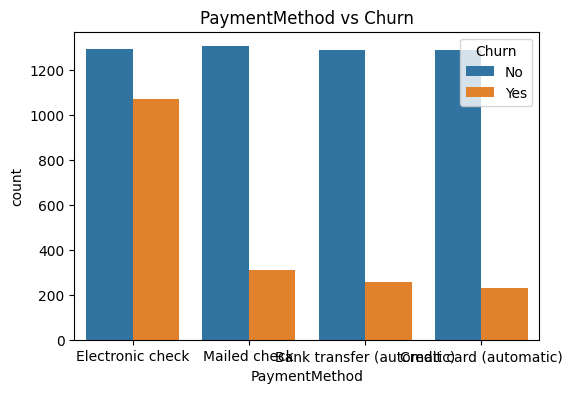

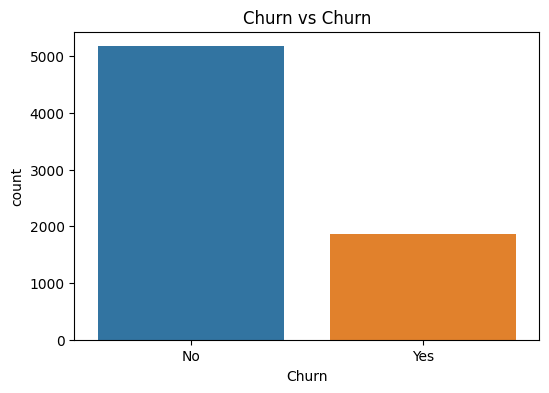

In [24]:
# Plot churn distribution across categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

#### Numerical Variables vs. Churn

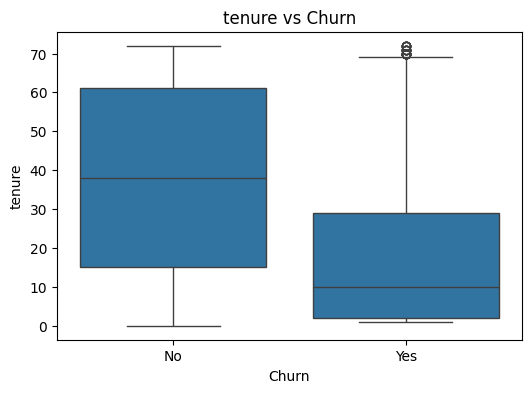

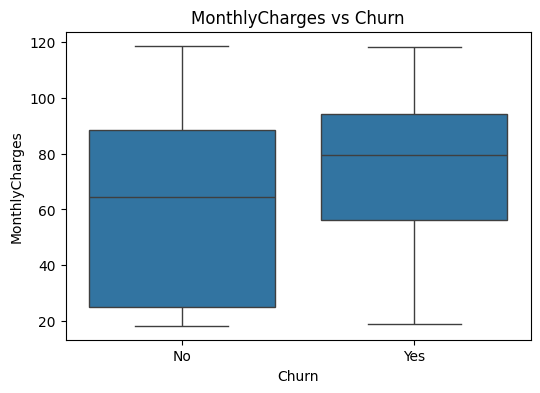

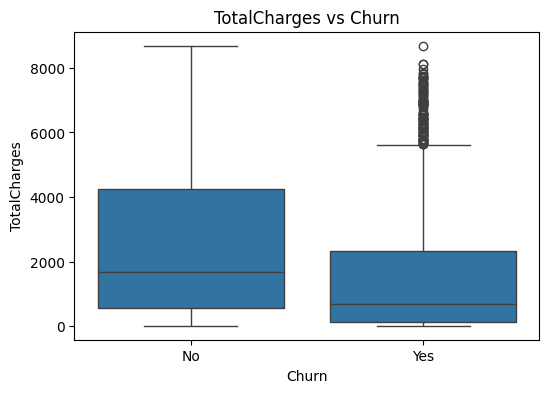

In [25]:
# Boxplot for numerical variables against Churn
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

#### Correlation Matrix

In [28]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [29]:
categorical_col = [
    "gender",
    "Partner",
    "Dependents",
    # "tenure",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "Churn",
]

print(f"Number of Categorical value : {len(categorical_col)}")
# df.SeniorCitizen.unique()

Number of Categorical value : 16


label encoder each categorical columns using sklearn library.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()
for each_col in categorical_col:
    df[each_col] = encoder.fit_transform(df[each_col].to_numpy())

In [33]:
df[categorical_col].head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0


Now, all columns are in numeric values. So we can find corelation between each column and churn column.

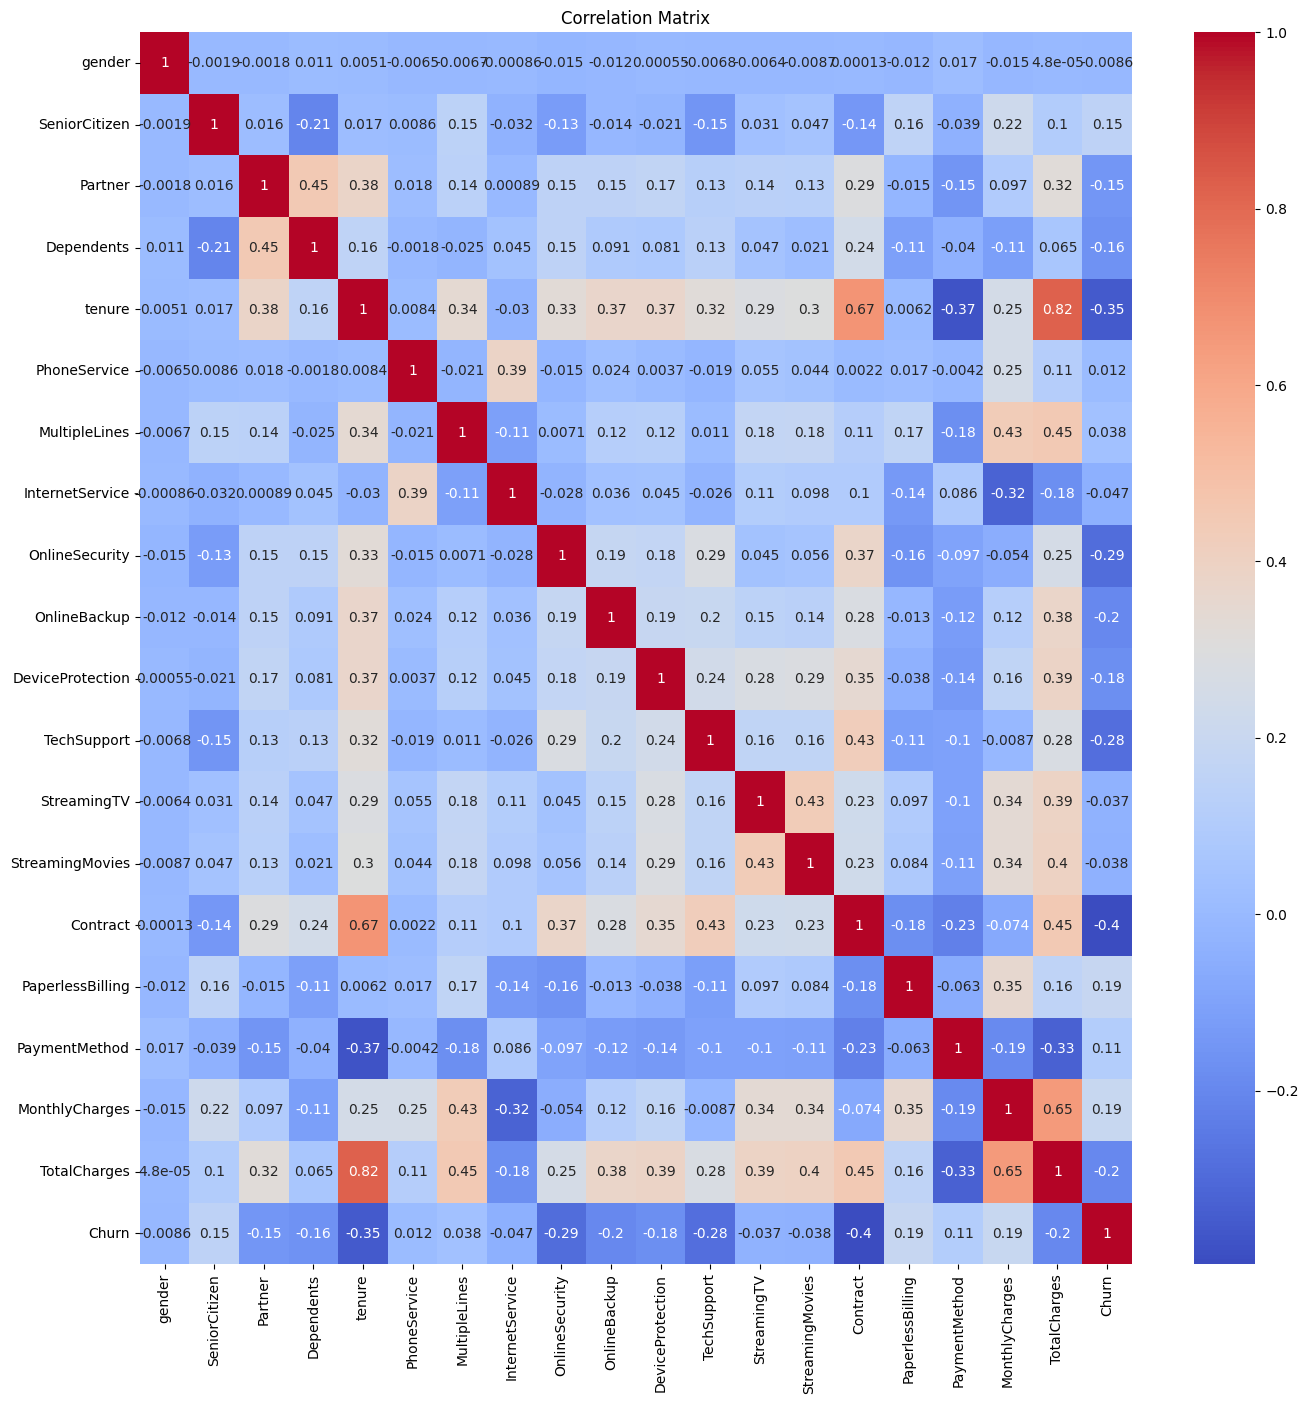

In [37]:
# Correlation matrix
plt.figure(figsize=(16, 16))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Using this correlation dataset we can understand the relationship between each column and output column(churn). If the number is 1 or nearer to 1 that means corresponding column is highly related, and vice versa.